# Example: Simple Linear Regression with the King County Housing Dataset
In your second problem set, you'll be using the [King County Housing dataset]('https://www.kaggle.com/datasets/shivachandel/kc-house-data'). This dataset contains information about the sales of residences (homes, condos, apartment buildings) within King County, WA (the county containing Seattle) from the 2014-2015 period.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
housing_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/datasets/refs/heads/main/kc_house_data.csv', parse_dates = ['date'])

In [46]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [47]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Linear Regression

### Narrowing the scope of the problem

For this example, we'll filter the dataset only to 3 BR homes in a single zip code. And, for the sake of having enough data, we'll use the zip code with the greatest number of 3 BR homes sold, which is 98042.

So you might imagine that you're trying to sell your 3 BR home in 98042, and you want to estimate what a fair market price would be and set your asking price accordingly.

In [48]:
# Finding the zip code with the most 3 BR homes

housing_df.query('bedrooms==3')\
    .groupby(by = 'zipcode').agg({'id':'count'})\
        .sort_values(by='id', ascending = False)

,id
zipcode,
98042,317
98034,303
98038,292
98103,283
98023,281
...,...
98010,51
98102,51
98024,44


In [49]:
# Filtering the data to only include 3 BR homes in that zip code.

housing3 = housing_df.query('bedrooms == 3 and zipcode == 98042')
housing3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
57,2799800710,2015-04-07,301000.0,3,2.50,2420,4750,2.0,0,0,...,8,2420,0,2003,0,98042,47.3663,-122.122,2690,4750
68,1274500060,2014-08-25,204000.0,3,1.00,1000,12070,1.0,0,0,...,7,1000,0,1968,0,98042,47.3621,-122.110,1010,12635
74,3444100400,2015-03-16,349000.0,3,1.75,1790,50529,1.0,0,0,...,7,1090,700,1965,0,98042,47.3511,-122.073,1940,50529
201,2222059065,2014-11-12,297000.0,3,2.50,1940,14952,2.0,0,0,...,8,1940,0,1994,0,98042,47.3777,-122.165,2030,10450
296,5468730030,2014-08-22,265000.0,3,2.00,1320,8959,1.0,0,0,...,7,1320,0,1993,0,98042,47.3536,-122.144,1740,7316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21420,9478550110,2015-03-03,299950.0,3,2.50,1740,4497,2.0,0,0,...,7,1740,0,2012,0,98042,47.3697,-122.117,1950,4486
21451,7140700690,2015-03-12,239950.0,3,1.75,1600,4888,1.0,0,0,...,6,1600,0,2014,0,98042,47.3830,-122.097,2520,5700
21526,1760650820,2015-04-28,290000.0,3,2.25,1610,3764,2.0,0,0,...,7,1610,0,2012,0,98042,47.3589,-122.083,1610,3825
21553,2522059251,2015-04-09,465000.0,3,2.50,2050,15035,2.0,0,0,...,9,2050,0,2006,0,98042,47.3619,-122.122,1300,15836


### Cleaning the data and selecting a feature

We'll remove columns that are either uninformative (e.g. id, date) or constant (e.g. bedrooms, zipcode, waterfront).

I like to do this by:
 1. requesting all the columns
 2. copying all the columns into a list (columns_to_keep)
 3. removing the ones I want removed
 4. extracting just those columns from the dataframe

In [50]:
housing3.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [51]:
columns_to_keep = ['price', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

housing3 = housing3[columns_to_keep]

Next, we'll calculate the correlation and display it as a heat map. We'll select the variable most correlated to price as our feature for modeling.

In [52]:
housing_corr = housing3.corr()
housing_corr

,price,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.545442,0.809535,0.540426,0.394416,-0.161509,0.725263,0.797889,0.048380,0.310763,-0.029596,-0.009834,-0.161651,0.661501,0.417028
bathrooms,0.545442,1.000000,0.700860,0.080940,0.644609,-0.431470,0.533476,0.685417,0.055520,0.707861,-0.162385,0.133747,-0.192372,0.610515,0.118165
sqft_living,0.809535,0.700860,1.000000,0.284833,0.522319,-0.307134,0.734776,0.923458,0.217862,0.432447,-0.112420,0.036043,-0.241881,0.770141,0.265556
sqft_lot,0.540426,0.080940,0.284833,1.000000,0.019590,-0.013589,0.136916,0.230406,0.145040,-0.123200,0.138612,0.019995,-0.016856,0.238468,0.562668
floors,0.394416,0.644609,0.522319,0.019590,1.000000,-0.409100,0.403710,0.639940,-0.287080,0.632382,-0.117929,0.009782,-0.157313,0.488257,-0.021495
condition,-0.161509,-0.431470,-0.307134,-0.013589,-0.409100,1.000000,-0.201157,-0.297693,-0.031132,-0.504516,-0.113069,-0.000707,0.147085,-0.362378,-0.010971
grade,0.725263,0.533476,0.734776,0.136916,0.403710,-0.201157,1.000000,0.751795,-0.026266,0.337224,-0.164262,-0.016369,-0.264209,0.690822,0.092479
sqft_above,0.797889,0.685417,0.923458,0.230406,0.639940,-0.297693,0.751795,1.000000,-0.173297,0.480472,-0.119714,-0.004595,-0.237341,0.740524,0.165258
sqft_basement,0.048380,0.055520,0.217862,0.145040,-0.287080,-0.031132,-0.026266,-0.173297,1.000000,-0.112136,0.015948,0.104201,-0.017151,0.093178,0.261271
yr_built,0.310763,0.707861,0.432447,-0.123200,0.632382,-0.504516,0.337224,0.480472,-0.112136,1.000000,-0.175139,-0.010309,-0.036663,0.488356,-0.109969


In [53]:
import seaborn as sns

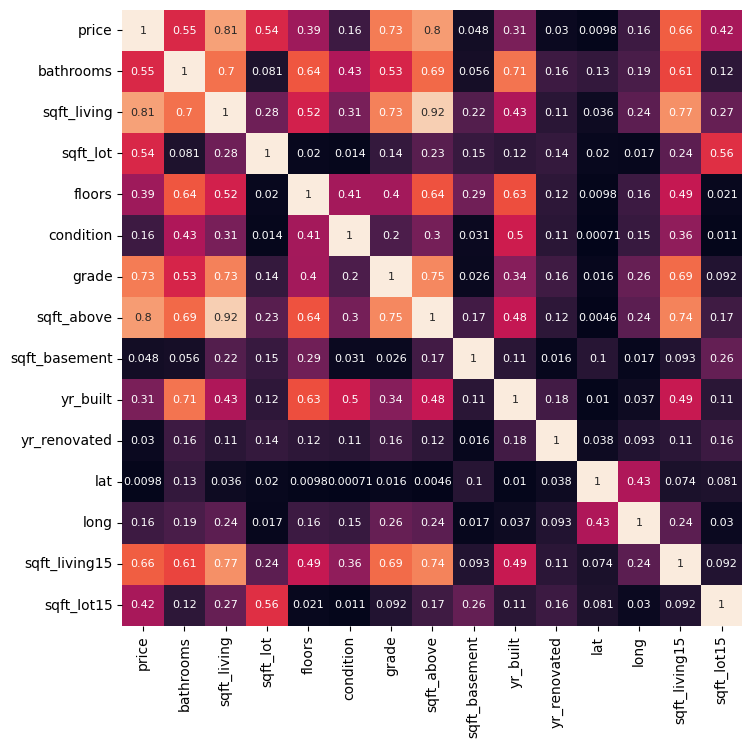

In [67]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

sns.heatmap(np.abs(housing_corr), vmin = 0, vmax = 1,
            annot = True, annot_kws = {'size':8},
            cbar = False)
plt.show()

With a correlation of 0.81, sqft_living is most correlated to price. So:
 - sqft_living is our feature
 - price is our target

Let's plot price vs sqft_living to see our dataset.

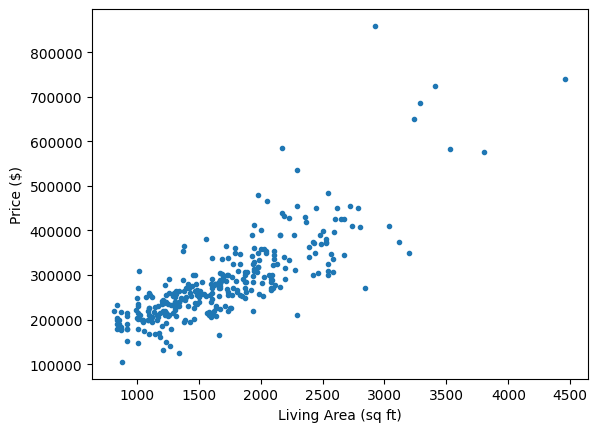

In [55]:
x = housing3[['sqft_living']]
y = housing3[['price']]

plt.plot(x, y, '.')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price ($)')
plt.show()

### Modeling time!

We will:
 1. Import the necessary functions
 2. Split our data into training and testing sets
 3. Create our model template, LinearRegression()
 4. Fit our model to the training data.
 5. Make predictions using both our training and testing data.
 6. Calculate $R^2$ and RMSE for both training and testing sets.
 7. Visualize our results.

In [56]:
# Importing packages

import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import root_mean_squared_error, r2_score

In [57]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=13)

In [58]:
# Creating and fitting the model
linreg = LinearRegression()  #makes the template
linreg.fit(x_train, y_train) #finds the optimal slope and

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


/Users/eatai/.pyenv/versions/datascience/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


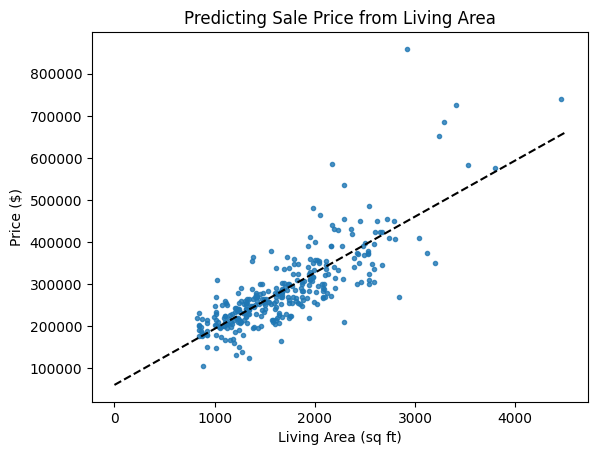

In [59]:
x_model = np.array([[0, 4500]]).T
y_model = linreg.predict(x_model)

plt.plot(x, y, '.', alpha = 0.8)
plt.plot(x_model, y_model, 'k--', label = 'Best-fit line')

plt.title('Predicting Sale Price from Living Area')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Price ($)')
plt.show()

**What do you think of the fit of this line? I see an issue...**

This fit is okay and I won't change it, but something bothers me. Do you see it? What could be done to improve the fit?

In [60]:
# Inspecting the model parameters
linreg.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['sqft_living'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[133.30980501]]),
 'rank_': 1,
 'singular_': array([9115.35178206]),
 'intercept_': array([60720.98693839])}

Do you see the slope and y-intercept in the list of model properties above?

 - slope = 133.31 ($/sqft)
 - y-intercept = 60,720.99 ($)

### Assessing the model

In [61]:
# Use the training and testing features to make predictions using the model
y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

In [62]:
# Calculate R2
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate RMSE
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

print(f'R2 train: {r2_train:.2f}\t\tRMSE train: {rmse_train:.2f}')
print(f'R2 test: {r2_test:.2f}\t\tRMSE test: {rmse_test:.2f}')

R2 train: 0.66		RMSE train: 55145.81
R2 test: 0.65		RMSE test: 62150.55


**Why do we assess model performance on both training and testing data?**

We'll talk more about model fit later, but what we want to see: *similar performance between training and testing results, but testing is generally slightly worse.*

 - If the model does well with training data and much worse with test data, this typically indicates over-fitting and you probably need a simpler model or more data. We are using as simple a model as possible, so that's not an issue.
 - If the model does badly with both training and testing data, this indicates under-fitting, and we could probably use a better model (more parameters).

**Sometimes**, depending on the random sampling of the train-test split, you may even get better performance on the testing data. This only really happens with smaller data sets such as this.

### Another Visualization

We can also visualize the predicted vs actual values. Later, when we use more features in our model, this is our only good option.

This plot helps visualize where the model is over-estimating or under-estimating the prices of homes. A point below the line means the actual price is greater than the predicted price, so the model is under-estimating; a point above suggests the model is over-estimating.

Do you see a problem now?

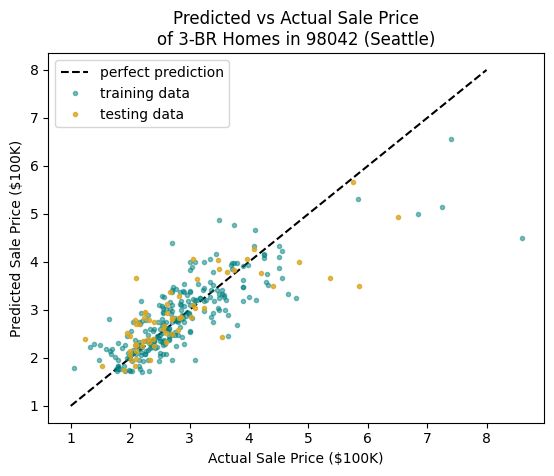

In [63]:

# I will divide prices by 100K saved as variable HK
HK = 100000 
low, high = 1, 8

plt.plot([low, high], [low, high], 'k--', label = 'perfect prediction')

# plot the training data
plt.plot(y_train/HK, y_pred_train/HK, 
         '.', color = 'teal', alpha = 0.5, 
         label = 'training data')

# plot the test data
plt.plot(y_test/HK, y_pred_test/HK, 
         '.', color = 'goldenrod', alpha = 0.8, 
         label = 'testing data')

plt.title('Predicted vs Actual Sale Price\nof 3-BR Homes in 98042 (Seattle)')
plt.xlabel('Actual Sale Price ($100K)')
plt.ylabel('Predicted Sale Price ($100K)')
plt.legend()
plt.show()